NBA Trends Project
.

This data was originally sourced from 538's Analysis of the Complete History Of The NBA and contains the original, unmodified data from Basketball Referendll as several additional variables 538 added to perform t own analysis.

You can read more about the data and how it's being used by 538 here. For this ,project we've limited the data to just 5 teams and 10 columns (plus one constructed column, pointand _diff, the difference between pts and opp another.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to make the output look better
np.set_printoptions(suppress=True, precision = 2)

In [24]:
#Importing Nba data
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [25]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

1. 
Suppose you want to compare thK knicks to thN netconcerningto points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their gam.g 

In [26]:
knicks_pts = nba_2010[nba_2010.fran_id == 'Knicks']
nets_pts = nba_2010[nba_2010.fran_id == 'Nets']

2. Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. Based on this value, do you think fran_id and pts are associated? Why or why not?

In [27]:
diff_means_2010 = knicks_pts.pts.mean() - nets_pts.pts.mean()
print(round(diff_means_2010,2))

9.73


3. Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?

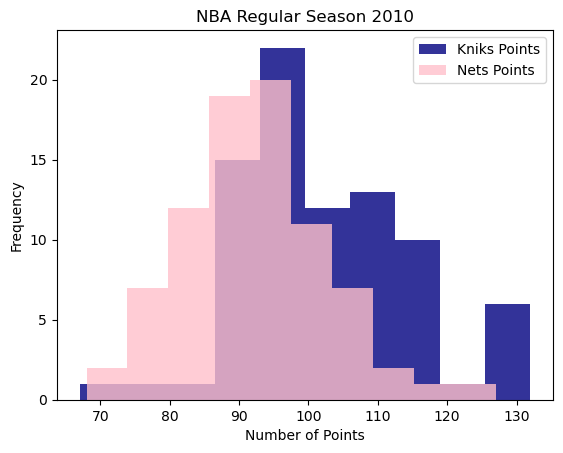

In [28]:
plt.hist(knicks_pts.pts, color='navy', label='Kniks Points', alpha=0.8)
plt.hist(nets_pts.pts, color='pink', label='Nets Points', alpha=0.8)
plt.title('NBA Regular Season 2010')
plt.xlabel('Number of Points')
plt.ylabel('Frequency')
plt.legend()
plt.show()

4. Compare the 2010 games to 2014. Replicate the steps from Tasks 2 and 3 using nba_2014. First, calculate the mean difference between the two teams points scored. Save and print the value as diff_means_2014. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?

0.45


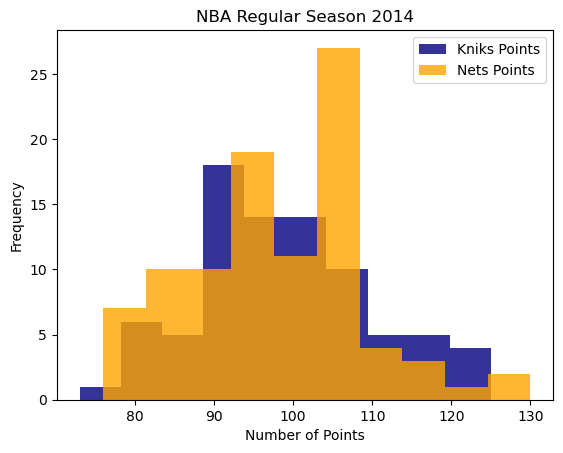

<Figure size 640x480 with 0 Axes>

In [30]:
knicks_pts_2014 = nba_2014[nba_2014.fran_id == 'Knicks']
nets_pts_2014 = nba_2014[nba_2014.fran_id == 'Nets']
diff_means_2014 = knicks_pts_2014.pts.mean() - nets_pts_2014.pts.mean()
print(round(diff_means_2014,2))

plt.hist(knicks_pts_2014.pts, color='navy', label='Kniks Points', alpha=0.8)
plt.hist(nets_pts_2014.pts, color='orange', label='Nets Points', alpha=0.8)
plt.title('NBA Regular Season 2014')
plt.xlabel('Number of Points')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.clf()

5. Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?

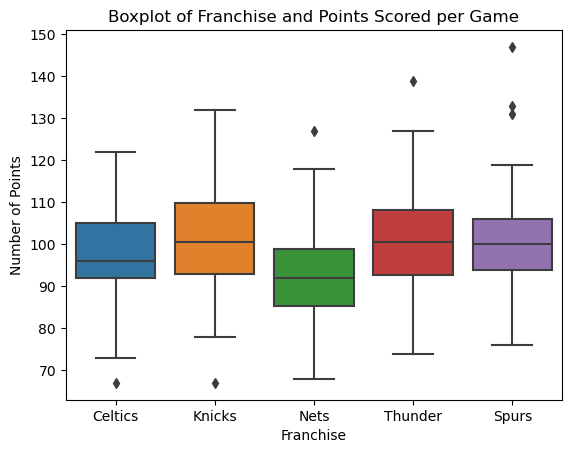

In [31]:
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.title('Boxplot of Franchise and Points Scored per Game')
plt.xlabel('Franchise')
plt.ylabel('Number of Points')
plt.show()

6. The variable, game_result, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, game_location, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”).

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as location_result_freq and print your result. Based on this table, do you think the variables are associated?`

In [32]:
location_result_freq = pd.crosstab (nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


7. Convert this table of frequencies to a table of proportions and save the result as location_result_proportions.

In [33]:
location_result_proportions = location_result_freq / len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


8. Using the contingency table created above (Task 6), calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?

In [34]:
chi2, pval, dof, expected = chi2_contingency (location_result_freq)
print (expected)
print(round(chi2, 2))

[[119. 119.]
 [106. 106.]]
6.5


9. 

Using nba_2010, calculate the covariance between forecast (538's projected win probability) and point_diff (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?

In [35]:
np.cov(nba_2010.forecast, nba_2010.point_diff)

array([[  0.05,   1.37],
       [  1.37, 186.56]])

10. Using nba_2010, calculate the correlation between forecast and point_diff. Call this point_diff_forecast_corr. Save and print your result. Does this value suggest an association between the two variables?

In [36]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

PearsonRResult(statistic=0.44020887084680815, pvalue=9.41039157313972e-23)


11. Generate a scatter plot of forecast (on the x-axis) and point_diff (on the y-axis). Does the correlation value make sense?

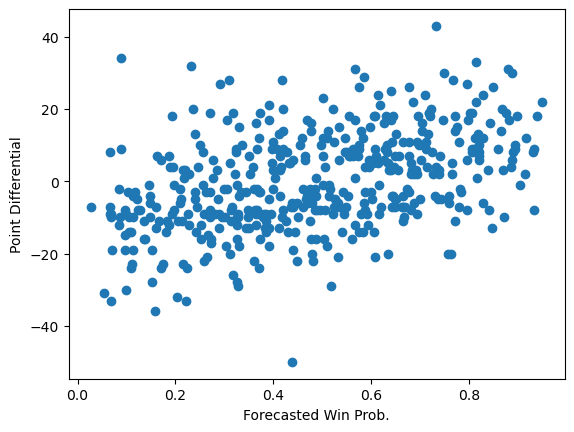

In [37]:
plt.scatter (x=nba_2010.forecast, y=nba_2010.point_diff)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()